# plot_AA_trends_spstere: 
## This script loads and plots observational and CMIP5 surface air temperature trend .npz in polar stereographic for 1979-2005

In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',size=10,weight='bold') #set default font size and weight for plots

#define workspace
workdir = '/Users/Karen/Desktop/Insight'

hist = np.load(workdir + '/area_average_trends_CMIP5.npz')
AA_trends_hist = hist['AA_trends_latlon_all']
lat = hist['lat']
lon = hist['lon']
AA_trends_hist = np.mean(AA_trends_hist,axis=3)

#add cyclic points manually 
AA_trends = np.zeros((AA_trends_hist.shape[0],AA_trends_hist.shape[1]+1,AA_trends_hist.shape[2]),np.float)
AA_trends[:,0:lon.size,:]= AA_trends_hist[:,:,:]
AA_trends[:,lon.size,:] = AA_trends_hist[:,lon.size-1,:]
lons = np.zeros([1,lon.size+1])
lons[0,0:lon.size] = lon[:]
lons[0,lon.size] = 360
lons = np.squeeze(lons)
lat = np.squeeze(lat)

AA_trends_ann = np.fliplr(np.squeeze(AA_trends[:,:,0]))
AA_trends_mam = np.fliplr(np.squeeze(AA_trends[:,:,1]))
AA_trends_son = np.fliplr(np.squeeze(AA_trends[:,:,3]))

#shift longitude
lons_new = lons + 90

In [4]:
#load observational files and historical CMIP5 file
obs = np.load(workdir + '/OBS_AA_trends.npz')
OBS_AA_trends = obs['OBS_trends']
#add cyclic points manually 
OBS_trends = np.zeros((OBS_AA_trends.shape[0],OBS_AA_trends.shape[1]+1,OBS_AA_trends.shape[2]),np.float)
OBS_trends[:,0:lon.size,:] = OBS_AA_trends[:,:,:]
OBS_trends[:,lon.size,:] = OBS_AA_trends[:,lon.size-1,:]

OBS_trends_ann = np.fliplr(OBS_trends[:,:,0])
OBS_trends_mam = np.fliplr(OBS_trends[:,:,1])
OBS_trends_son = np.fliplr(OBS_trends[:,:,2])

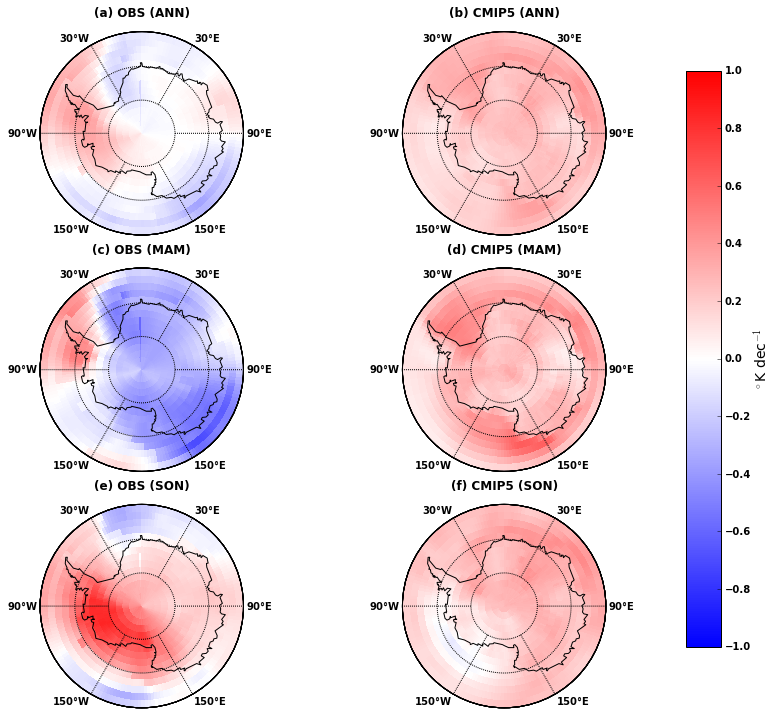

In [3]:
m = Basemap(projection='spstere', lat_0=-90, lon_0=180, boundinglat=-60, resolution='c',round=True)
#m = Basemap(projection='robin', lon_0=180, resolution='c')
xx, yy = np.meshgrid(lons_new, lat)
x, y = m(xx, yy) #converts rectangular meshgrid into meshgrid for the specific projection

fig = plt.figure(figsize=(16,10))

axi = fig.add_subplot(321)
m.drawcoastlines()
m.drawmapboundary(fill_color='none')
pc = m.pcolor(y, x, OBS_trends_ann, cmap='bwr')
pc.set_clim(vmin=-1, vmax=1)
m.drawparallels(range(-90,-60,10), labels=[1,1,0,0])
m.drawmeridians(range(30,360,60), labels=[0,0,1,1])
axi.set_title('(a) OBS (ANN)', y=1.05,weight='bold')

axi = fig.add_subplot(322)
m.drawcoastlines(linewidth=1.0, linestyle='solid', color='k')
m.drawmapboundary(fill_color='none')
pc = m.pcolor(y, x, AA_trends_ann, cmap='bwr')
pc.set_clim(vmin=-1, vmax=1)
m.drawparallels(range(-90,-60,10), labels=[1,1,0,0])
m.drawmeridians(range(30,360,60), labels=[0,0,1,1])
axi.set_title('(b) CMIP5 (ANN)',y=1.05,weight='bold')

axi = fig.add_subplot(323)
m.drawcoastlines(linewidth=1.0, linestyle='solid', color='k')
m.drawmapboundary(fill_color='none')
pc = m.pcolor(y, x, OBS_trends_mam, cmap='bwr')
pc.set_clim(vmin=-1, vmax=1)
m.drawparallels(range(-90,-60,10), labels=[1,1,0,0])
m.drawmeridians(range(30,360,60), labels=[0,0,1,1])
axi.set_title('(c) OBS (MAM)',y=1.05,weight='bold')

axi = fig.add_subplot(324)
m.drawcoastlines(linewidth=1.0, linestyle='solid', color='k')
m.drawmapboundary(fill_color='none')
pc = m.pcolor(y, x, AA_trends_mam, cmap='bwr')
pc.set_clim(vmin=-1, vmax=1)
m.drawparallels(range(-90,-60,10), labels=[1,1,0,0])
m.drawmeridians(range(30,360,60), labels=[0,0,1,1])
axi.set_title('(d) CMIP5 (MAM)',y=1.05,weight='bold')

axi = fig.add_subplot(325)
m.drawcoastlines(linewidth=1.0, linestyle='solid', color='k')
m.drawmapboundary(fill_color='none')
pc = m.pcolor(y, x, OBS_trends_son, cmap='bwr')
pc.set_clim(vmin=-1, vmax=1)
m.drawparallels(range(-90,-60,10), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
axi.set_title('(e) OBS (SON)',y=1.05,weight='bold')

axi = fig.add_subplot(326)
m.drawcoastlines(linewidth=1.0, linestyle='solid', color='k')
m.drawmapboundary(fill_color='none')
pc = m.pcolor(y, x, AA_trends_son, cmap='bwr')
pc.set_clim(vmin=-1, vmax=1)
m.drawparallels(range(-90,-60,10), labels=[1,1,0,0])
m.drawmeridians(range(30,360,60), labels=[0,0,1,1])
axi.set_title('(f) CMIP5 (SON)',y=1.05,weight='bold')

plt.tight_layout()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.72, 0.1, 0.03, 0.8])
cbar = fig.colorbar(pc, cbar_ax)
cbar.set_label('$^\circ$K dec$^{-1}$', fontsize=14, labelpad=1)
cbar.set_ticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])